# Image filtering and correction
## Tasks
* Substract from the original image its filtered copy
* Filter Lena from salt and pepper
* Make intensity correction by R(x, y, sigma) = log[I(x, y)] — log[I(x, y)*G(x, y, sigma)]
,where G - gaussian, sigma - coef of blurring, * - convolution
remapping of image from (-1,1) to (0,255) with I = 255*I + 127


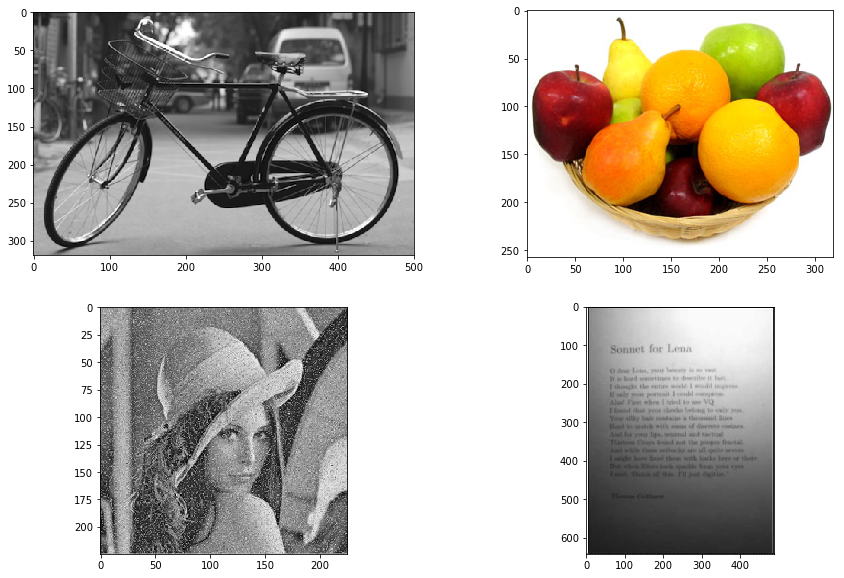

In [4]:
import matplotlib.pyplot as plt
import matplotlib.image as img
%matplotlib inline
imbyc = img.imread('./bycicle.png')
imlen = img.imread('./lena.jpg')
imfru = img.imread('./unnamed.png')
imbook = img.imread('./book.png')
fig = plt.figure(figsize=(15,10))
plt.subplot(221)
plt.imshow(imbyc,cmap='gray')
plt.subplot(222)
plt.imshow(imfru)
plt.subplot(223)
plt.imshow(imlen)
plt.subplot(224)
plt.imshow(imbook)


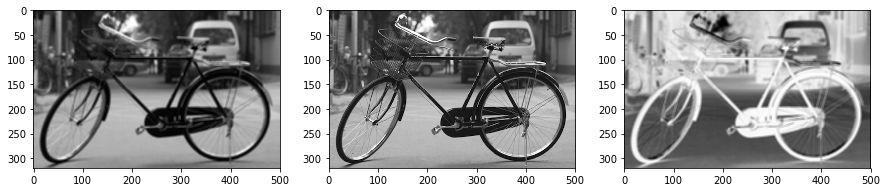

In [5]:
from scipy import ndimage
import numpy as np
import matplotlib.image as img
import matplotlib.pyplot as plt

imbyc = img.imread('./bycicle.png')
imlen = img.imread('./lena.jpg')
imfru = img.imread('./unnamed.png')
imbook = img.imread('./book.png')
k = np.array([[1,1,1,1,1],[1,1,1,1,1],[1,1,1,1,1],[1,1,1,1,1],[1,1,1,1,1]])
flt = ndimage.convolve(imbyc, k, mode='nearest', cval=0.0)
fig = plt.figure(figsize=(15,10))
plt.subplot(131)
plt.imshow(flt,cmap='gray')
plt.subplot(132)
plt.imshow(imbyc,cmap='gray')
plt.subplot(133)
plt.imshow((imbyc-flt),cmap='gray')
plt.show()


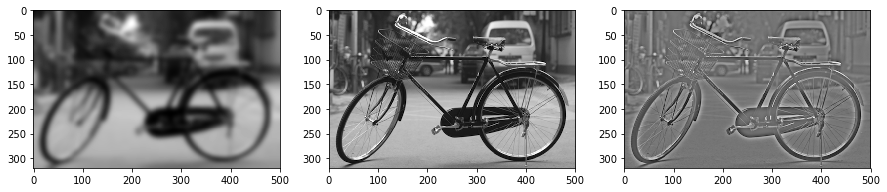

In [6]:
from scipy import ndimage as nimg
import numpy as np
gflt = nimg.gaussian_filter(imbyc, sigma=5)
fig = plt.figure(figsize=(15,10))
plt.subplot(131)
plt.imshow(gflt,cmap='gray')
plt.subplot(132)
plt.imshow(imbyc,cmap='gray')
plt.subplot(133)
plt.imshow((imbyc-gflt),cmap='gray')

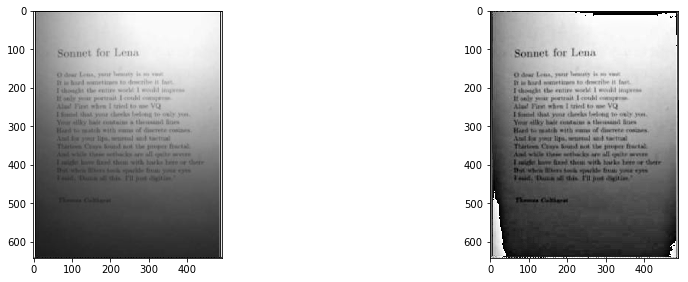

In [74]:
from math import log
import numpy as np
from scipy import ndimage
import matplotlib.pyplot as plt
import matplotlib.image as img
from skimage import util
plt.figure(figsize = (15, 10))
impaper = img.imread('./book.png')
# plt.imshow(impaper)

blurred = ndimage.gaussian_filter(impaper, 20)
# plt.subplot(222)
# plt.imshow(blurred)
r = np.log10(blurred) - np.log10(impaper)
plt.subplot(222)
plt.imshow(util.invert(r) + impaper)
plt.subplot(221)
plt.imshow(impaper)
plt.show()

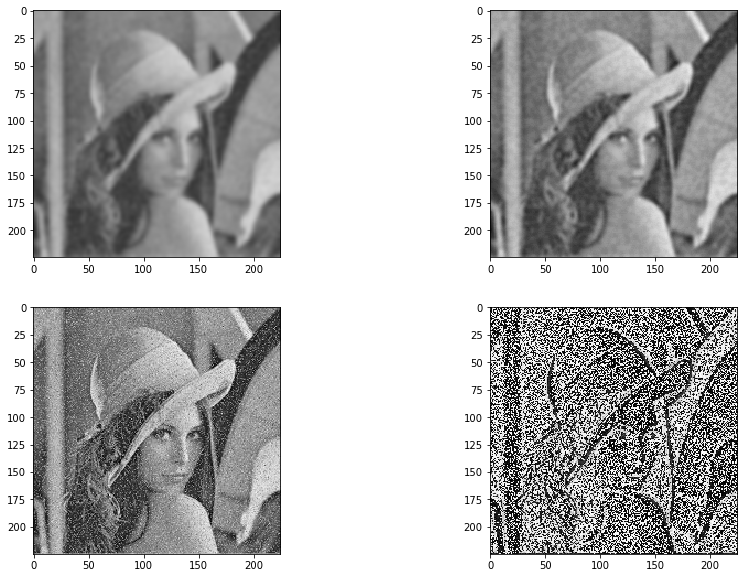

In [32]:
import matplotlib.pyplot as plt
import matplotlib.image as img
import numpy as np
from scipy import misc
from scipy import ndimage
plt.figure(figsize=(15,10))
imlen = img.imread('./lena.jpg')
blurred_f = ndimage.gaussian_filter(imlen, 2)
filter_blurred_f = ndimage.gaussian_filter(blurred_f, 1)
alpha = 5
sharpened = blurred_f + alpha * (blurred_f - filter_blurred_f)
plt.subplot(221)
plt.imshow(blurred_f)
plt.subplot(222)
plt.imshow(sharpened)
plt.subplot(223)
plt.imshow(imlen)
plt.subplot(224)
im = imlen - blurred_f
plt.imshow(im)
plt.show()

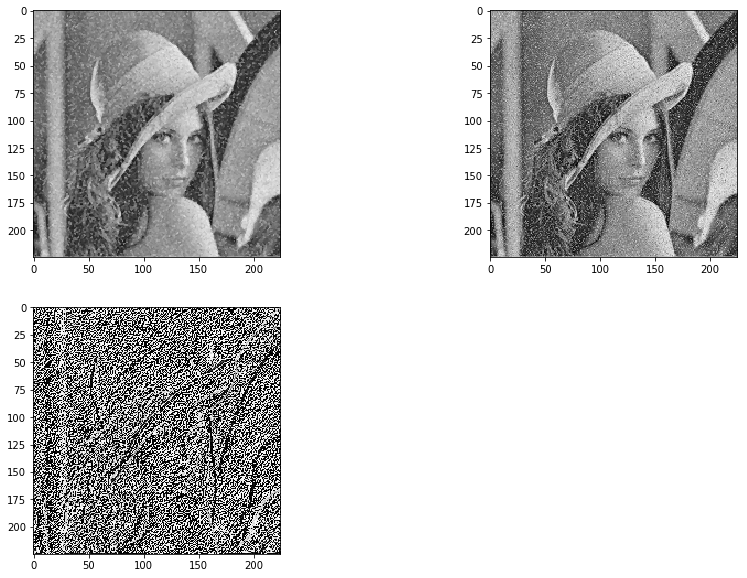

In [22]:
import matplotlib.pyplot as plt
import matplotlib.image as img
import numpy as np
from scipy import misc
from scipy import ndimage
plt.figure(figsize=(15,10))
imlen = img.imread('./lena.jpg')
res = ndimage.median_filter(imlen, 2)
plt.subplot(221)
plt.imshow(res)
plt.subplot(222)
plt.imshow(imlen)
plt.subplot(223)
im = imlen - res
plt.imshow(im)
plt.show()